In [208]:
#시각화 결과를 화면에 바로 출력하도록 
%matplotlib inline

import pandas as pd
import seaborn as sns

## Load Data & Research

In [184]:
path = "./"
train = pd.read_csv(path+"train.csv", index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
test = pd.read_csv(path+"test.csv", index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [214]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

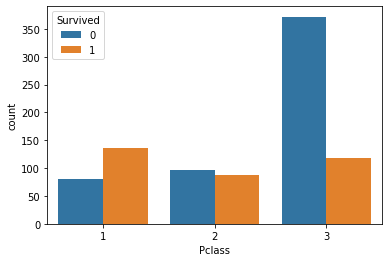

In [216]:
sns.countplot(data=train, x="Pclass", hue="Survived")

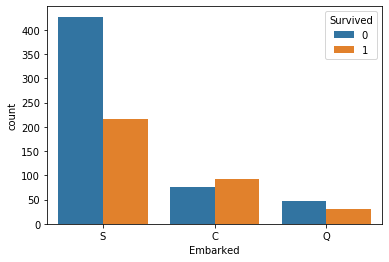

In [218]:
sns.countplot(data=train, x="Embarked", hue="Survived")

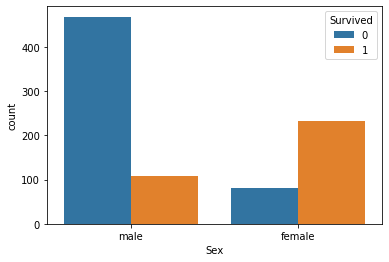

In [219]:
sns.countplot(data=train, x="Sex", hue="Survived")

## Preprocessing

### Encode Sex

In [186]:
train["Sex_encode"] = train["Sex"].replace("male",0).replace("female",1)
print(train.shape)
train[["Sex","Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [187]:
test["Sex_encode"] = test["Sex"].replace("male",0).replace("female",1)
print(test.shape)
test[["Sex","Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0
893,female,1
894,male,0
895,male,0
896,female,1


### Encode Single

In [220]:
train["IsSingle"] = (train["SibSp"]+train["Parch"]==0)
print(train.shape)
train[["IsSingle","Survived"]].head()

(891, 18)


,IsSingle,Survived
PassengerId,,
1,False,0
2,False,1
3,True,1
4,False,1
5,True,0


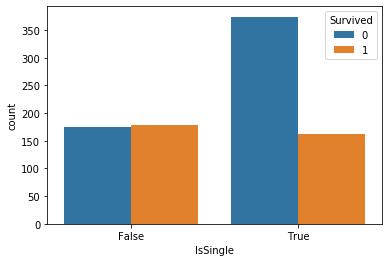

In [221]:
sns.countplot(data=train, x="IsSingle", hue="Survived")

In [189]:
test["IsSingle"] = (test["SibSp"]+test["Parch"]==0)
print(test.shape)
# test[["IsSingle","Survived"]].head()

(418, 12)


### Empty Age -> 0

In [190]:
train[ (train["Age"].isnull()) & (train["Survived"]==0)].shape
# train["Age"] = train["Age"].fillna(0)
# 52명이나 살아있는데 0으로? 일단 keep -> 0.803~~~ -> 0.75119으로 더 낮아짐 

In [191]:
# train[ (train["Age"].isnull()) & (train["Survived"]==0)].shape

(0, 13)

### Divide into age section

In [192]:
train["IsYoung"] = train["Age"]<=15
test["IsYoung"] = test["Age"]<=15

In [193]:
train["IsOld"] = (train["Age"]>=65) & (train["Age"]<80)
test["IsOld"] = (test["Age"]<=15) & (test["Age"]<80)

### Fill in missing Fare

In [194]:
test[test["Fare"].isnull()==1].shape
test["Fare"] = test["Fare"].fillna(0)

In [195]:
test[test["Fare"].isnull()==1].shape

(0, 14)

### Encode Embarked(One Hot Encoding)

In [196]:
# pd.pivot_table(data=train, index="Embarked")
train.groupby("Embarked").nunique()
# train.Embarked.value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,IsSingle,IsYoung,IsOld
Embarked,,,,,,,,,,,,,,,
C,2,3,168,2,59,3,4,122,74,57,1,2,2,2,2
Q,2,3,77,2,25,4,4,66,22,3,1,2,2,2,2
S,2,3,644,2,81,7,7,494,163,89,1,2,2,2,2


In [197]:
train["Embarked_C"] = train["Embarked"]=="C"
train["Embarked_Q"] = train["Embarked"]=="Q"
train["Embarked_S"] = train["Embarked"]=="S"
print(train.shape)
train[["Embarked_C","Embarked_Q","Embarked_S"]].head()

(891, 18)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True


In [198]:
test["Embarked_C"] = test["Embarked"]=="C"
test["Embarked_Q"] = test["Embarked"]=="Q"
test["Embarked_S"] = test["Embarked"]=="S"
print(test.shape)
test[["Embarked_C","Embarked_Q","Embarked_S"]].head()

(418, 17)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,False,True,False
893,False,False,True
894,False,True,False
895,False,False,True
896,False,False,True


In [199]:
feature_names = ["Pclass", "Sex_encode", "Fare", "Embarked_C", "Embarked_Q", "Embarked_S", "IsSingle", "IsYoung", "IsOld"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'IsSingle',
 'IsYoung',
 'IsOld']

In [200]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 9)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,IsSingle,IsYoung,IsOld
PassengerId,,,,,,,,,
1,3,0,7.2500,False,False,True,False,False,False
2,1,1,71.2833,True,False,False,False,False,False
3,3,1,7.9250,False,False,True,True,False,False
4,1,1,53.1000,False,False,True,False,False,False
5,3,0,8.0500,False,False,True,True,False,False


In [201]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 9)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,IsSingle,IsYoung,IsOld
PassengerId,,,,,,,,,
892,3,0,7.8292,False,True,False,True,False,False
893,3,1,7.0000,False,False,True,False,False,False
894,2,0,9.6875,False,True,False,True,False,False
895,3,0,8.6625,False,False,True,True,False,False
896,3,1,12.2875,False,False,True,False,False,False


In [202]:
label_name = "Survived"
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### User Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 30)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [204]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [205]:
prediction = model.predict(X_test)
print(prediction.shape)
prediction[0:5]

(418,)


array([0, 0, 0, 0, 1], dtype=int64)

### Submit

In [206]:
submit = pd.read_csv(path+"gender_submission.csv", index_col="PassengerId")
submit["Survived"] = prediction
print(submit.shape)
submit.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [207]:
submit.to_csv(path+"titanic_200513(2).csv")